##### Boot cell below - skip if `module_update.py` is in same folder as notebook, and pay attention if you have file with same name.

In [ ]:
# The code-snippet in this cell is for booting up the notebook resources.
# A file named 'module_update.py' is downloaded from Github, ready to be run in the next cell. It will download the rest.

import urllib.request
urllib.request.urlretrieve(url = "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py", filename="module_update.py");

### --------------------------------------------------------------------------------------------------------

# Ny funksjonalitet med et eksempel

*Lars G B Johnsen* oktober 2018

I løpet av seminaret vi hadde på NTNU nå 24. og 25. oktober, luftet Anders Skare Malvik behovet for å kunne gjøre kollokasjoner og clustring basert på flere ord med utgangspunkt i kommandoen `urn_coll`. Her er et par eksempler på korpus og ord-analyse, som viser de nye kommandoene. 

For kollokasjonsanalyser, se også nettsiden for [Lancsbox](http://corpora.lancs.ac.uk/lancsbox/), og artikkelen [Collocations in Context](http://docserver.ingentaconnect.com/deliver/connect/jbp/13846655/v20n2/s1.pdf?expires=1540574308&id=0000&titleid=3714&checksum=91C9D11C6284D0B2A214598FFE26E86E), eller forlagets [adgangsside](http://www.ingentaconnect.com/content/jbp/ijcl/2015/00000020/00000002/art00001#)
Og [her er en artikkel](http://ceur-ws.org/Vol-2021/paper6.pdf) jeg skrev om grafanalyse for ord og semantisk analyse, som bruker noen av de redskapene beskrevet nedenfor.  

#### Start med å importere modulene

In [2]:
import module_update
from module_update import update

Updated file nbtext.py
Updated file nbpictures.py


In [3]:
update('graph_networkx_louvain')
import nbtext as nb
import graph_networkx_louvain as gnl
from graph_networkx_louvain import cutdown, make_collocation_graph

Updated file graph_networkx_louvain.py


## Bygg korpus og analysér

Korpuset defineres som 30 bøker fra dewey 799 - husk å ta med % spesifikasjonen, viktig å få med hele hierarkiet under 799. Tilsvarende for en annen Dewey, eller om dere har et fast korpus å jobbe med.

In [108]:
korpus = nb.get_urn({'ddk': '799.2%', 'year':1980, 'next':50, 'limit':300})
len(korpus)

221

Aggregrer korpuset  med kommandoen `get_aggregated_corpus()`, der argumentet her output fra `get_urn` ovenfor, men det kan være en hvilken som helst liste med URN-er. Det aggregerte korpuset vil utgjøre konteksten for ord-kollokasjoner hentet fra korpuset.

In [109]:
aggs = nb.get_aggregated_corpus(korpus)

Det aggregerte korpuset ser sånn ut. Notasjonen `x[0:10]` betyr at vi ser på data i posisjon 0 til 10, bytt ut med 20:50 for å se de fra 20 til 50, osv. 

In [110]:
aggs[0:10]

,0
.,668411
",",488668
og,385498
i,294194
er,239485
på,192850
det,182138
som,165863
en,164518
av,159802


Ikke så mye å si her, annet et at de vanlige ordene (eller tokener) er på topp.

Så lager vi en kollokasjon for en samling våpen med utgangspunkt i korpuset.

In [145]:
kollokasjonsord = "gevær revolver pistol hagle rifle"

In [146]:
kollokasjoner = nb.urn_coll_words(kollokasjonsord, korpus, limit = 1000) # limit begrenser antall treff pr. bok

Selve kollokasjonen kan vi også ta en titt på:

In [147]:
kollokasjoner[0:10]

,0
.,3669
med,3589
",",2735
og,2221
er,1705
på,1324
det,1080
en,1076
i,996
av,877


Den skiller seg allerede en del fra det aggregerte. Ikke minst i antall. En del overlapp er det.

### Sammenlign kollokasjonen med korpuset.

For å finne ut hvilke ord som er særlig knyttet til ordene i kollokasjon sammenlignes kollokasjonen over, den kalt `våpen`, med ordlisten i `aggs`. Både kollokasjonen og ordlistene er såkalte ordbagger, eller bag of words, definert som en liste av ord knyttet til en tall-verdi, frekvens eller annet. 

Kommandoen for å sammenligne er `compare_word_bags` fra `nbtext`. Den tar noen parametre (sjekk ut med shift-tab), men her skal vi se på `another_freq`. Eksperimenter med verdien til `another_freq` som angir minimumsfrekvens på ordet i referansen, eller konteksten om du vil. Desto høyere verdi som settes for `another_freq` desto mer generell blir kollokasjonen, den vil gjelde for ord med større utbredelse i selve korpuset. Det kan også settes krav til verdien av frekvensene i kollokasjonen, men i og med at kollokasjonen utgjør en delmengde (eller delbag) av referansen/konteksten er det greiere å bare kutte ned på den større. 

I uttrykkene brukes notasjonen `x[0:10]` for å se på et utsnitt av data. Om første tall mangler, er det det samme som 0, så `x[:10]` er det samme som `x[0:10]`.

In [148]:
nb.compare_word_bags(kollokasjoner, aggs, another_freq= 30)[:5]

,diff
helautomatisk,1.061538
Dobbeltløpet,0.903226
Halvautomatisk,0.849315
halvautomatisk,0.843511
finkalibret,0.803419


In [149]:
nb.compare_word_bags(kollokasjoner, aggs, another_freq= 10)[:5]

,diff
Finkalibret,1.333333
927.,1.083333
helautomatisk,1.061538
Jaktskudd,1.000000
pumpehagle/halvautomatisk,1.000000


# Lag en graf over kollokasjonen

Graf fra kollokasjonen der korpuset selv fungerer som referansekorpus. Kommandoen for å lage grafer er hentet fra `graph_networkx_louvain` modulen for å analysere grafer og sammenhenger. Grafen tar utgangspunkt i kollokasjonen og gir den en struktur, samtidig som grafen er en utvidelse.

I kommandoen betyr verdien for `cutoff` det samme som `another_freq` ovenfor. For hver runde med kollokasjon fjernes ord med frekvens lavere enn 10 fra konteksten. Verdien at `top` angir hvor stor del av hver kollokasjon som skal tas med i grafen til slutt.


In [150]:
G = make_collocation_graph(kollokasjonsord, urns=korpus,  top=40, cutoff = 10)

Grafen kuttes ned slik at løvnodene ikke blir med. Ta bort `cutdown()` fra uttrykket under for å se hele grafen med løvnoder.

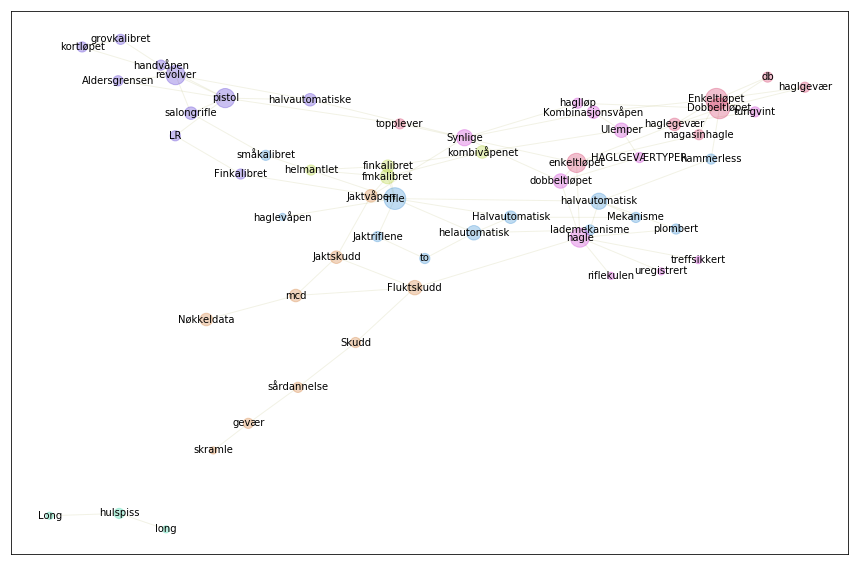

In [163]:
gnl.show_graph(cutdown(G), spread=0.12, deltax=0, deltay=0)

Grafen gir data for klikk-clustre og hierarkisk louvain-clustring. 

In [152]:
# første tall, x i (x, y) sier noe om klikkstørrelsen, så (3, y) betyr cluster fra 3-klikker. 
# Det andre tallet, y, er en vilkårlig nummerering

gnl.show_cliques(cutdown(G))

(3, 1) grovkalibret, revolver, kortløpet

(3, 2) dobbeltløpet, hagle, enkeltløpet

(3, 3) Fluktskudd, Jaktskudd, mcd

(3, 4) haglgevær, haglegevær, Enkeltløpet, db, Dobbeltløpet

(3, 5) revolver, Aldersgrensen, salongrifle, pistol, halvautomatiske, handvåpen

(3, 6) rifle, helautomatisk, Halvautomatisk



In [153]:
gnl.show_community(cutdown(G))

1 helmantlet, kombivåpenet, finkalibret, fmkalibret

2 Skyting

3 Long, hulspiss, long

4 halvautomatisk, Mekanisme, Halvautomatisk, haglevåpen, hammerless, to, småkalibret, rifle, helautomatisk, Jaktriflene, plombert, lademekanisme

5 revolver, Finkalibret, handvåpen, grovkalibret, kortløpet, Aldersgrensen, LR, salongrifle, pistol, halvautomatiske

6 tungvint, riflekulen, uregistrert, HAGLGEVÆRTYPER, treffsikkert, hagle, Ulemper, haglløp, Kombinasjonsvåpen, Synlige, dobbeltløpet

7 topplever, db, Dobbeltløpet, haglgevær, haglegevær, Enkeltløpet, magasinhagle, enkeltløpet

8 Fluktskudd, Jaktskudd, Jaktvåpen, skramle, mcd, Skudd, gevær, sårdannelse, Nøkkeldata



En hurtig sammenligning av resultatet av kollokasjonen alene, med de sentrale nodene i grafen. Husk at alle data kommer fra korpuset, så om det endres vil alt endres! 

In [154]:
nb.compare_word_bags(kollokasjoner, aggs, another_freq=30)[:10]

,diff
helautomatisk,1.061538
Dobbeltløpet,0.903226
Halvautomatisk,0.849315
halvautomatisk,0.843511
finkalibret,0.803419
Enkeltløpet,0.763636
revolver,0.735849
enkeltløpet,0.720930
long,0.693878
pistol,0.653333


In [155]:
nb.frame(dict(nb.central_characters(cutdown(G), n=50)),'graph')[:10]

,graph
rifle,0.157895
Enkeltløpet,0.157895
Dobbeltløpet,0.140351
enkeltløpet,0.122807
hagle,0.122807
pistol,0.122807
revolver,0.122807
halvautomatisk,0.087719
Synlige,0.087719
fmkalibret,0.070175


Sammenligningen kan gjøres enklere ved å slå sammen de to kolonnene i en ramme. Selve kombinasjonen er en munnfull (for alle, inklusiv Python-eksperter!), men bær over for akkurat den her notebooken. 

Her kan det være interessant å eksperimentere med kollokasjonen, og `another_freq` (det første grønne tallet i linja under, det) - hvilken verdi gjør at `diff` får mer til felles med de sentrale elementene i grafen fra `graph`-kolonnen?  

In [156]:
combo = nb.compare_word_bags(kollokasjoner, aggs, another_freq= 10).join(nb.frame(dict(nb.central_characters(cutdown(G), n=50)),'graph'), how='outer')

In [157]:
# bytt ut "graph" med "diff" for å sortere på den ene eller andre kolonnen

nb.heatmap(combo.sort_values(by='diff', ascending=False)[0:20])

,diff,graph
Finkalibret,1.33333,0.0350877
927.,1.08333,0
helautomatisk,1.06154,0.0701754
Jaktskudd,1,0.0526316
pumpehagle/halvautomatisk,1,0
Jaktriflene,1,0.0350877
uregistrert,0.916667,0
Dobbeltløpet,0.903226,0.140351
Halvautomatisk,0.849315,0.0526316
halvautomatisk,0.843511,0.0877193


# Struktur på selv kollokasjonen

Ovenfor nevnte jeg at grafen strukturerer kollokasjonen. Her kan vi se hvordan. Et viktig parameter for kollokasjonen er `another_freq`, som igjen kan endres på. Effekten på grafen er interessant. Men det er verdt å nevne at det er parametre i flere lag her, i og med at grafen selv er konstruert med utgangspunkt i valg på kontekst-frekvens. 

In [158]:
Cgr = G.subgraph(list(nb.compare_word_bags(kollokasjoner, aggs, another_freq= 10).index))

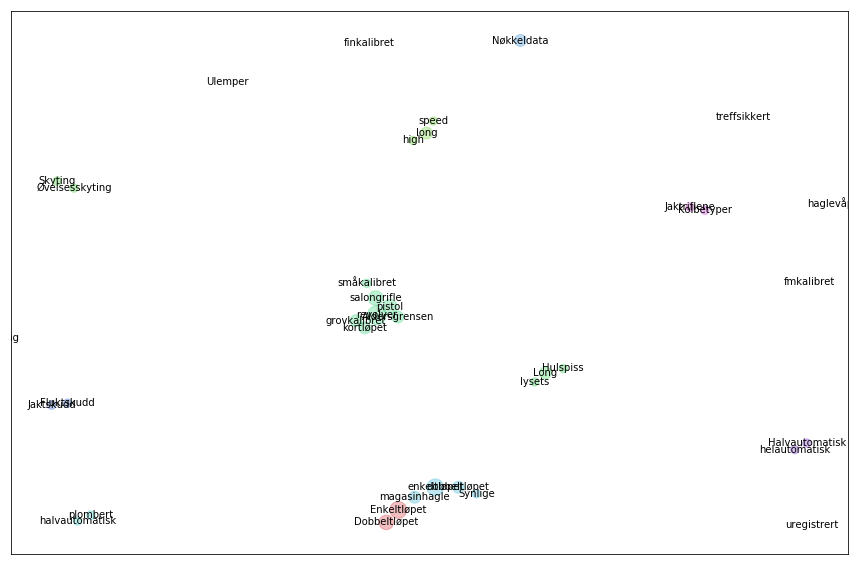

In [159]:
gnl.show_graph(Cgr, spread=0.1)

In [160]:
gnl.show_community(Cgr)

1 finkalibret

2 fmkalibret

3 high, long, speed

4 Øvelsesskyting, Skyting

5 Long, Hulspiss, lysets

6 revolver, småkalibret, grovkalibret, kortløpet, Aldersgrensen, salongrifle, pistol

7 treffsikkert

8 plombert, halvautomatisk

9 Synlige, dobbeltløpet, enkeltløpet, magasinhagle

10 Nøkkeldata

11 Fluktskudd, Jaktskudd

12 habile

13 uregistrert

14 helautomatisk, Halvautomatisk

15 Ulemper

16 Jaktriflene, Kolbetyper

17 Fluktskyting

18 Finkalibret

19 skramle

20 Enkeltløpet, Dobbeltløpet

21 underbeslag

22 haglevåpen

23 sårdannelse

24 riflekulen



In [161]:
gnl.show_cliques(Cgr)

(3, 1) grovkalibret, revolver, kortløpet

(3, 2) revolver, Aldersgrensen, salongrifle, pistol

